In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
groove_density = 300  # grooves per mm
d = 1e-3 / groove_density  # grating spacing in meters
wavelength = 633e-9  # wavelength in meters (e.g., 633 nm for HeNe laser)
N = 1000  # number of grooves illuminated
L = 0.005  # distance to screen in meters
s = 0.1e-3  # slit width
alpha_deg = 0  # incident angle in degrees

# Angle of incidence (in degrees and converted to radians)
alpha = np.radians(alpha_deg)

# Calculate diffraction angles for orders -2 to 2
def angle(d, alpha, m, wavelength):
    sin_theta = np.sin(alpha) + (m * wavelength) / d
    if np.abs(sin_theta) <= 1:
        return np.arcsin(sin_theta)
    else:
        return None
    


In [4]:
alpha = 0.19106029214617076
m =1
wl = 633e-9
d = 1e-3/300
print(np.arcsin(m*wl/d-np.sin(alpha)))


0.0
0.0


In [29]:
#Wacelength 500nm alpha = 0.19
alpha = 0.19106029214617076

wl = 500e-9
d = 1e-3/300
for m in range(-2,3):
    angle_pos  = np.arcsin(m*wl/d-np.sin(alpha))
    angle_neg  = np.arcsin(m*wl/d-np.sin(-alpha))
    pos_pos = np.tan(angle_pos)*L
    pos_neg = np.tan(angle_neg)*L
    print(m)
    print("Angle of {} and pos on screen {} ".format(angle_pos,pos_pos))
    print("Angle of {} and pos on screen {} ".format(angle_neg,pos_neg))



-2
Angle of -0.5119750412179568 and pos on screen -0.0028097729161371365 
Angle of -0.11032366109438711 and pos on screen -0.0005538672275402353 
-1
Angle of -0.3468105647183441 and pos on screen -0.0018070913579616554 
Angle of 0.03991059445817386 and pos on screen 0.00019965899286137454 
0
Angle of -0.19106029214617076 and pos on screen -0.0009670978565342983 
Angle of 0.19106029214617076 and pos on screen 0.0009670978565342983 
1
Angle of -0.03991059445817386 and pos on screen -0.00019965899286137454 
Angle of 0.3468105647183441 and pos on screen 0.0018070913579616554 
2
Angle of 0.11032366109438711 and pos on screen 0.0005538672275402353 
Angle of 0.5119750412179568 and pos on screen 0.0028097729161371365 


Order -2: Angle pos=-0.5120, pos on screen=-0.5620
Order -2: Angle neg=-0.1103, pos on screen=-0.1108
Order -1: Angle pos=-0.3468, pos on screen=-0.3614
Order -1: Angle neg=0.0399, pos on screen=0.0399
Order 0: Angle pos=-0.1911, pos on screen=-0.1934
Order 0: Angle neg=0.1911, pos on screen=0.1934
Order 1: Angle pos=-0.0399, pos on screen=-0.0399
Order 1: Angle neg=0.3468, pos on screen=0.3614
Order 2: Angle pos=0.1103, pos on screen=0.1108
Order 2: Angle neg=0.5120, pos on screen=0.5620


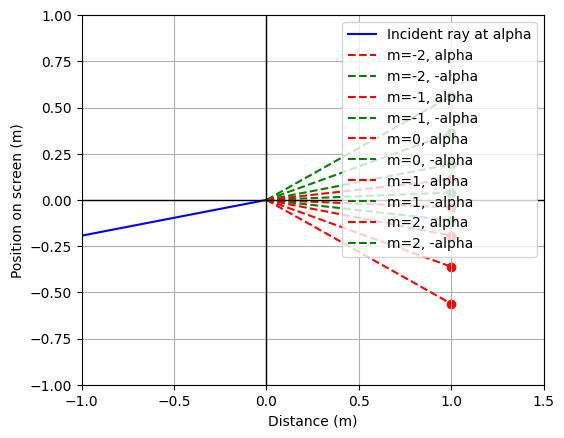

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
alpha = 0.19106029214617076  # Incident angle in radians
wl = 500e-9  # Wavelength in meters
d = 1e-3 / 300  # Grating spacing in meters
L = 1.0  # Distance to screen in meters

# Create a figure and axis for plotting
fig, ax = plt.subplots()

# Plot the incident ray from the left at angle alpha
x_left = np.linspace(-L, 0, 100)  # From -L to 0
y_left = np.tan(alpha) * x_left   # Line equation for the ray at angle alpha
ax.plot(x_left, y_left, 'b-', label="Incident ray at alpha")

# Calculate and plot diffraction orders
for m in range(-2, 3):
    try:
        # Calculate angles for diffraction maxima
        angle_pos = np.arcsin(m * wl / d - np.sin(alpha))
        angle_neg = np.arcsin(m * wl / d - np.sin(-alpha))
        
        # Calculate the position on the screen (at distance L)
        pos_pos = np.tan(angle_pos) * L
        pos_neg = np.tan(angle_neg) * L

        # Plot the diffracted rays for positive and negative alpha
        ax.plot([0, L], [0, pos_pos], 'r--', label=f"m={m}, alpha")
        ax.plot([0, L], [0, pos_neg], 'g--', label=f"m={m}, -alpha")

        # Mark the positions of maxima on the screen
        ax.scatter(L, pos_pos, color='red')
        ax.scatter(L, pos_neg, color='green')

        print(f"Order {m}: Angle pos={angle_pos:.4f}, pos on screen={pos_pos:.4f}")
        print(f"Order {m}: Angle neg={angle_neg:.4f}, pos on screen={pos_neg:.4f}")

    except ValueError:
        # Skip the case where arcsin produces a domain error
        print(f"Order {m}: Invalid (arcsin domain error)")

# Customize plot
ax.axhline(0, color='black',linewidth=1)
ax.axvline(0, color='black',linewidth=1)
ax.set_xlim(-L, L * 1.5)
ax.set_ylim(-L, L)
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Position on screen (m)')
ax.legend()
ax.grid(True)
ax.set_aspect('equal', 'box')

# Show the plot
plt.show()


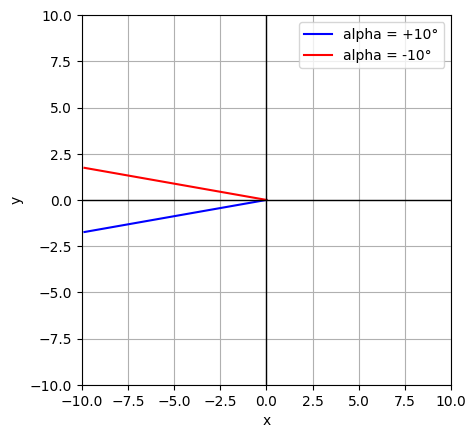

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot two lines at angles -alpha and +alpha
def plot_two_lines_neg(alpha, start_point, length=10):
    # Convert angle to radians
    alpha_rad = np.radians(alpha)
    
    # Define the start point
    x_start, y_start = start_point
    
    # Calculate end points for the positive angle line
    x_end_pos = x_start - length * np.cos(alpha_rad)
    y_end_pos = y_start - length * np.sin(alpha_rad)
    
    # Calculate end points for the negative angle line
    x_end_neg = x_start - length * np.cos(-alpha_rad)
    y_end_neg = y_start - length * np.sin(-alpha_rad)
    
    # Create the figure and axis
    fig, ax = plt.subplots()
    
    # Plot the lines
    ax.plot([x_start, x_end_pos], [y_start, y_end_pos], label=f"alpha = +{alpha}°", color='blue')
    ax.plot([x_start, x_end_neg], [y_start, y_end_neg], label=f"alpha = -{alpha}°", color='red')
    
    # Plot settings
    ax.axhline(0, color='black', linewidth=1)
    ax.axvline(0, color='black', linewidth=1)
    ax.set_xlim(-length, length)
    ax.set_ylim(-length, length)
    ax.grid(True)
    ax.set_aspect('equal', 'box')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.legend()
    
    # Show the plot
    
def plot_two_lines_pos(alpha, start_point, length=10):
    # Convert angle to radians
    alpha_rad = np.radians(alpha)
    
    # Define the start point
    x_start, y_start = start_point
    
    # Calculate end points for the positive angle line
    x_end_pos = x_start + length * np.cos(alpha_rad)
    y_end_pos = y_start + length * np.sin(alpha_rad)
    
    # Calculate end points for the negative angle line
    x_end_neg = x_start + length * np.cos(-alpha_rad)
    y_end_neg = y_start + length * np.sin(-alpha_rad)
    
    # Create the figure and axis
    fig, ax = plt.subplots()
    
    # Plot the lines
    ax.plot([x_start, x_end_pos], [y_start, y_end_pos], label=f"alpha = +{alpha}°", color='blue')
    ax.plot([x_start, x_end_neg], [y_start, y_end_neg], label=f"alpha = -{alpha}°", color='red')
    
    # Plot settings
    ax.axhline(0, color='black', linewidth=1)
    ax.axvline(0, color='black', linewidth=1)
    ax.set_xlim(-length, length)
    ax.set_ylim(-length, length)
    ax.grid(True)
    ax.set_aspect('equal', 'box')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.legend()
# Example usage
alpha = 10  # Angle in degrees
start_point = (0, 0)  # Start point of the lines

plot_two_lines_neg(alpha, start_point)
plot_two_lines_pos(alpha, start_point)
plt.show()


Order -1: Angle pos=-0.3896, pos on screen=-0.4106
Order 0: Angle pos=-0.1911, pos on screen=-0.1934
Order 1: Angle pos=0.0000, pos on screen=0.0000


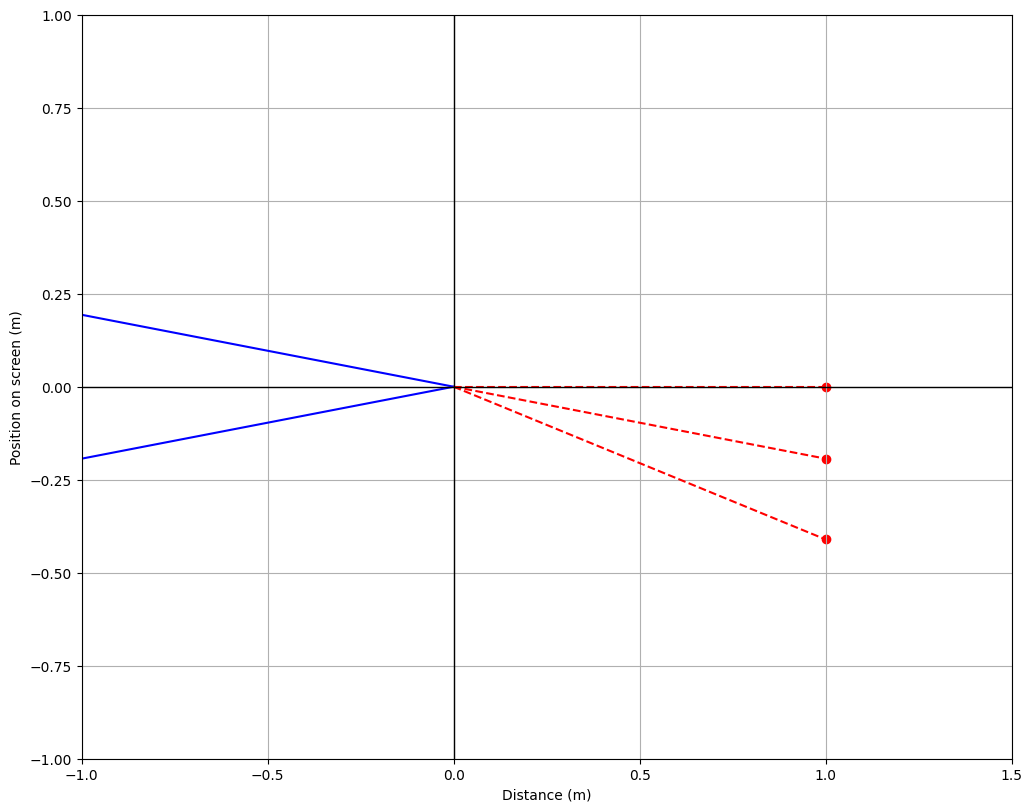

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
alpha = 0.19106029214617076  # Incident angle in radians
wl = 633e-9  # Wavelength in meters
d = 1e-3 / 300  # Grating spacing in meters
L = 1.0  # Distance to screen in meters

# Create a figure and axis for plotting with figsize (12, 10)
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the incident rays from the left at angles +alpha and -alpha
x_left = np.linspace(-L, 0, 100)  # From -L to 0
y_left_pos = np.tan(alpha) * x_left   # Line equation for the ray at +alpha
y_left_neg = np.tan(-alpha) * x_left  # Line equation for the ray at -alpha

# Plot the two incoming rays
ax.plot(x_left, y_left_pos, 'b-', label=f"Incident ray at +alpha = {alpha:.4f} rad")
ax.plot(x_left, y_left_neg, 'b-', label=f"Incident ray at -alpha = {alpha:.4f} rad")

# Calculate and plot diffraction orders
for m in range(-1, 2):
    try:
        # Calculate angles for diffraction maxima
        angle_pos = np.arcsin(m * wl / d - np.sin(alpha))
        #angle_neg = np.arcsin(m * wl / d - np.sin(-alpha))
        
        # Calculate the position on the screen (at distance L)
        pos_pos = np.tan(angle_pos) * L
        #pos_neg = np.tan(angle_neg) * L

        # Plot the diffracted rays for positive and negative alpha
        ax.plot([0, L], [0, pos_pos], 'r--', label=f"m={m}, alpha={alpha}")
        #ax.plot([0, L], [0, pos_neg], 'g--', label=f"m={m}, alpha=-{alpha}")

        # Mark the positions of maxima on the screen
        ax.scatter(L, pos_pos, color='red')
        #ax.scatter(L, pos_neg, color='green')

        print(f"Order {m}: Angle pos={angle_pos:.4f}, pos on screen={pos_pos:.4f}")
        #print(f"Order {m}: Angle neg={angle_neg:.4f}, pos on screen={pos_neg:.4f}")

    except ValueError:
        # Skip the case where arcsin produces a domain error
        print(f"Order {m}: Invalid (arcsin domain error)")

# Customize plot
ax.axhline(0, color='black',linewidth=1)  # x-axis
ax.axvline(0, color='black',linewidth=1)  # y-axis
ax.set_xlim(-L, L * 1.5)
ax.set_ylim(-L, L)
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Position on screen (m)')
ax.grid(True)
ax.set_aspect('equal', 'box')

# Show the plot
plt.show()


Order -2: Angle pos=-0.6061, pos on screen=-0.6932
Order -2: Angle neg=-0.1911, pos on screen=-0.1934
Order -1: Angle pos=-0.3896, pos on screen=-0.4106
Order -1: Angle neg=0.0000, pos on screen=0.0000
Order 0: Angle pos=-0.1911, pos on screen=-0.1934
Order 0: Angle neg=0.1911, pos on screen=0.1934
Order 1: Angle pos=0.0000, pos on screen=0.0000
Order 1: Angle neg=0.3896, pos on screen=0.4106
Order 2: Angle pos=0.1911, pos on screen=0.1934
Order 2: Angle neg=0.6061, pos on screen=0.6932


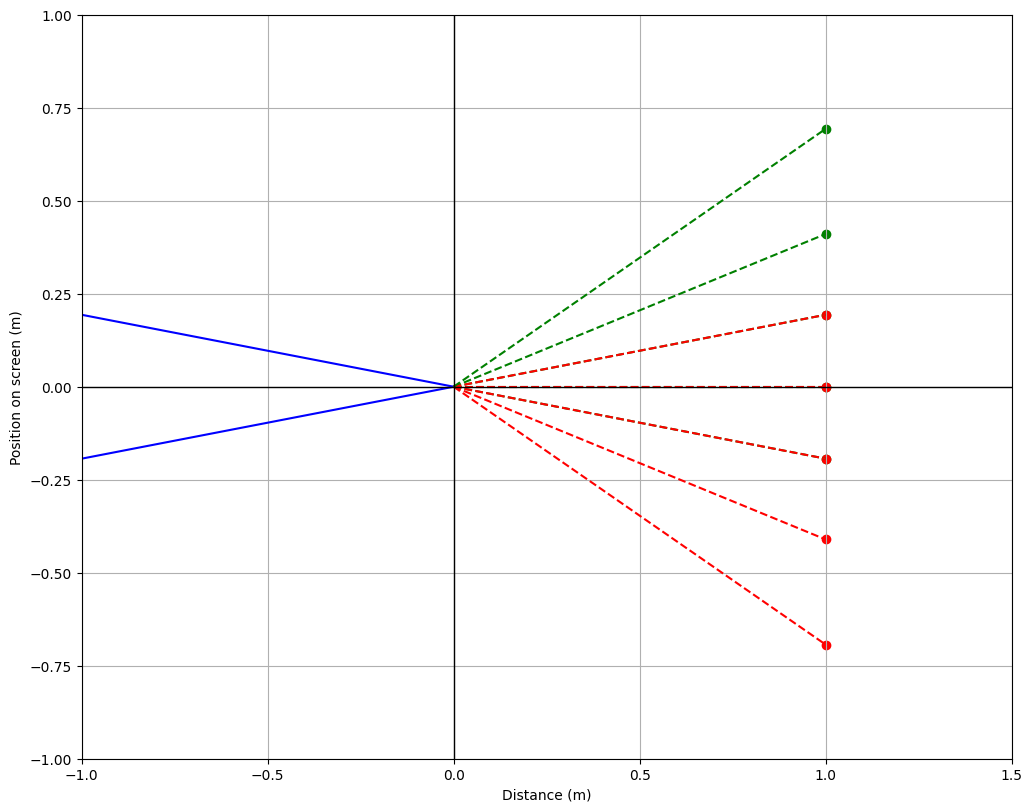

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
alpha = 0.19106029214617076  # Incident angle in radians
wl = 633e-9  # Wavelength in meters
d = 1e-3 / 300  # Grating spacing in meters
L = 1.0  # Distance to screen in meters

# Create a figure and axis for plotting with figsize (12, 10)
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the incident rays from the left at angles +alpha and -alpha
x_left = np.linspace(-L, 0, 100)  # From -L to 0
y_left_pos = np.tan(alpha) * x_left   # Line equation for the ray at +alpha
y_left_neg = np.tan(-alpha) * x_left  # Line equation for the ray at -alpha

# Plot the two incoming rays
ax.plot(x_left, y_left_pos, 'b-', label=f"Incident ray at +alpha = {alpha:.4f} rad")
ax.plot(x_left, y_left_neg, 'b-', label=f"Incident ray at -alpha = {alpha:.4f} rad")

# Calculate and plot diffraction orders
for m in range(-2, 3):
    try:
        # Calculate angles for diffraction maxima
        angle_pos = np.arcsin(m * wl / d - np.sin(alpha))
        angle_neg = np.arcsin(m * wl / d - np.sin(-alpha))
        
        # Calculate the position on the screen (at distance L)
        pos_pos = np.tan(angle_pos) * L
        pos_neg = np.tan(angle_neg) * L

        # Plot the diffracted rays for positive alpha (use red for all these rays)
        ax.plot([0, L], [0, pos_pos], 'r--')
        
        # Plot the diffracted rays for negative alpha (use green for all these rays)
        ax.plot([0, L], [0, pos_neg], 'g--')

        # Mark the positions of maxima on the screen
        ax.scatter(L, pos_pos, color='red')
        ax.scatter(L, pos_neg, color='green')

        print(f"Order {m}: Angle pos={angle_pos:.4f}, pos on screen={pos_pos:.4f}")
        print(f"Order {m}: Angle neg={angle_neg:.4f}, pos on screen={pos_neg:.4f}")

    except ValueError:
        # Skip the case where arcsin produces a domain error
        print(f"Order {m}: Invalid (arcsin domain error)")

# Customize plot
ax.axhline(0, color='black',linewidth=1)  # x-axis
ax.axvline(0, color='black',linewidth=1)  # y-axis
ax.set_xlim(-L, L * 1.5)
ax.set_ylim(-L, L)
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Position on screen (m)')
ax.grid(True)
ax.set_aspect('equal', 'box')

# Show the plot
plt.show()


/var/folders/dm/_7xx464s467cm2g79s2z8cvw0000gq/T/ipykernel_44800/3207026727.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x_left, y_left_pos, 'b-', label=f"Incident ray at +alpha = {alpha:.4f} rad", color='red')
/var/folders/dm/_7xx464s467cm2g79s2z8cvw0000gq/T/ipykernel_44800/3207026727.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x_left, y_left_neg, 'b-', label=f"Incident ray at -alpha = {alpha:.4f} rad", color='green' )


Order -2: Angle pos=-0.6061, pos on screen=-0.6932
Order -2: Angle neg=-0.1911, pos on screen=-0.1934
Order -1: Angle pos=-0.3896, pos on screen=-0.4106
Order -1: Angle neg=0.0000, pos on screen=0.0000
Order 0: Angle pos=-0.1911, pos on screen=-0.1934
Order 0: Angle neg=0.1911, pos on screen=0.1934
Order 1: Angle pos=0.0000, pos on screen=0.0000
Order 1: Angle neg=0.3896, pos on screen=0.4106
Order 2: Angle pos=0.1911, pos on screen=0.1934
Order 2: Angle neg=0.6061, pos on screen=0.6932


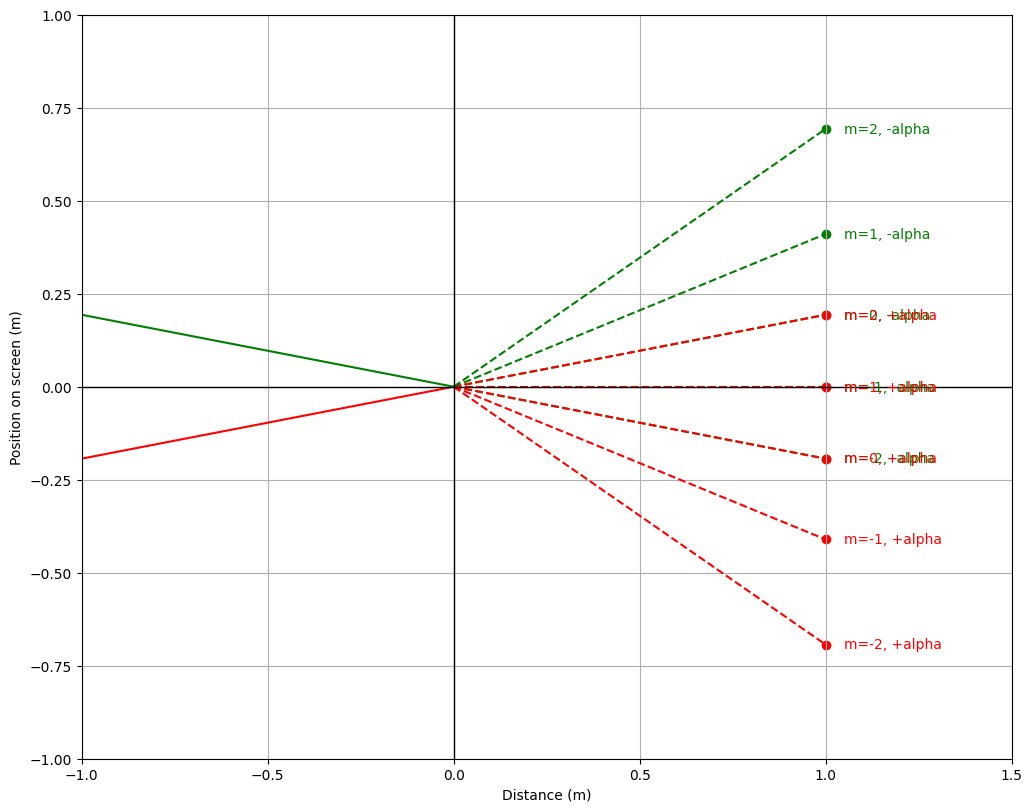

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
alpha = 0.19106029214617076  # Incident angle in radians
wl = 633e-9  # Wavelength in meters
d = 1e-3 / 300  # Grating spacing in meters
L = 1.0  # Distance to screen in meters

# Create a figure and axis for plotting with figsize (12, 10)
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the incident rays from the left at angles +alpha and -alpha
x_left = np.linspace(-L, 0, 100)  # From -L to 0
y_left_pos = np.tan(alpha) * x_left   # Line equation for the ray at +alpha
y_left_neg = np.tan(-alpha) * x_left  # Line equation for the ray at -alpha

# Plot the two incoming rays
ax.plot(x_left, y_left_pos, 'b-', label=f"Incident ray at +alpha = {alpha:.4f} rad", color='red')
ax.plot(x_left, y_left_neg, 'b-', label=f"Incident ray at -alpha = {alpha:.4f} rad", color='green' )

# Calculate and plot diffraction orders
for m in range(-2, 3):
    try:
        # Calculate angles for diffraction maxima
        angle_pos = np.arcsin(m * wl / d - np.sin(alpha))
        angle_neg = np.arcsin(m * wl / d - np.sin(-alpha))
        
        # Calculate the position on the screen (at distance L)
        pos_pos = np.tan(angle_pos) * L
        pos_neg = np.tan(angle_neg) * L

        # Plot the diffracted rays for positive alpha (use red for all these rays)
        ax.plot([0, L], [0, pos_pos], 'r--')
        
        # Plot the diffracted rays for negative alpha (use green for all these rays)
        ax.plot([0, L], [0, pos_neg], 'g--')

        # Mark the positions of maxima on the screen
        ax.scatter(L, pos_pos, color='red')
        ax.scatter(L, pos_neg, color='green')

        # Add labels for each line next to the corresponding maxima point
        ax.text(L + 0.05, pos_pos, f"m={m}, +alpha", color='red', verticalalignment='center')
        ax.text(L + 0.05, pos_neg, f"m={m}, -alpha", color='green', verticalalignment='center')

        print(f"Order {m}: Angle pos={angle_pos:.4f}, pos on screen={pos_pos:.4f}")
        print(f"Order {m}: Angle neg={angle_neg:.4f}, pos on screen={pos_neg:.4f}")

    except ValueError:
        # Skip the case where arcsin produces a domain error
        print(f"Order {m}: Invalid (arcsin domain error)")

# Customize plot
ax.axhline(0, color='black',linewidth=1)  # x-axis
ax.axvline(0, color='black',linewidth=1)  # y-axis
ax.set_xlim(-L, L * 1.5)
ax.set_ylim(-L, L)
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Position on screen (m)')
ax.grid(True)
ax.set_aspect('equal', 'box')

# Show the plot
plt.show()


Order -4: Angle pos=-1.2516, pos on screen=-0.0303
Order -4: Angle neg=-0.6061, pos on screen=-0.0069
Order -3: Angle pos=-0.8627, pos on screen=-0.0117
Order -3: Angle neg=-0.3896, pos on screen=-0.0041
Order -2: Angle pos=-0.6061, pos on screen=-0.0069
Order -2: Angle neg=-0.1911, pos on screen=-0.0019
Order -1: Angle pos=-0.3896, pos on screen=-0.0041
Order -1: Angle neg=0.0000, pos on screen=0.0000
Order 0: Angle pos=-0.1911, pos on screen=-0.0019
Order 0: Angle neg=0.1911, pos on screen=0.0019
Order 1: Angle pos=0.0000, pos on screen=0.0000
Order 1: Angle neg=0.3896, pos on screen=0.0041
Order 2: Angle pos=0.1911, pos on screen=0.0019
Order 2: Angle neg=0.6061, pos on screen=0.0069
Order 3: Angle pos=0.3896, pos on screen=0.0041
Order 3: Angle neg=0.8627, pos on screen=0.0117
Order 4: Angle pos=0.6061, pos on screen=0.0069
Order 4: Angle neg=1.2516, pos on screen=0.0303


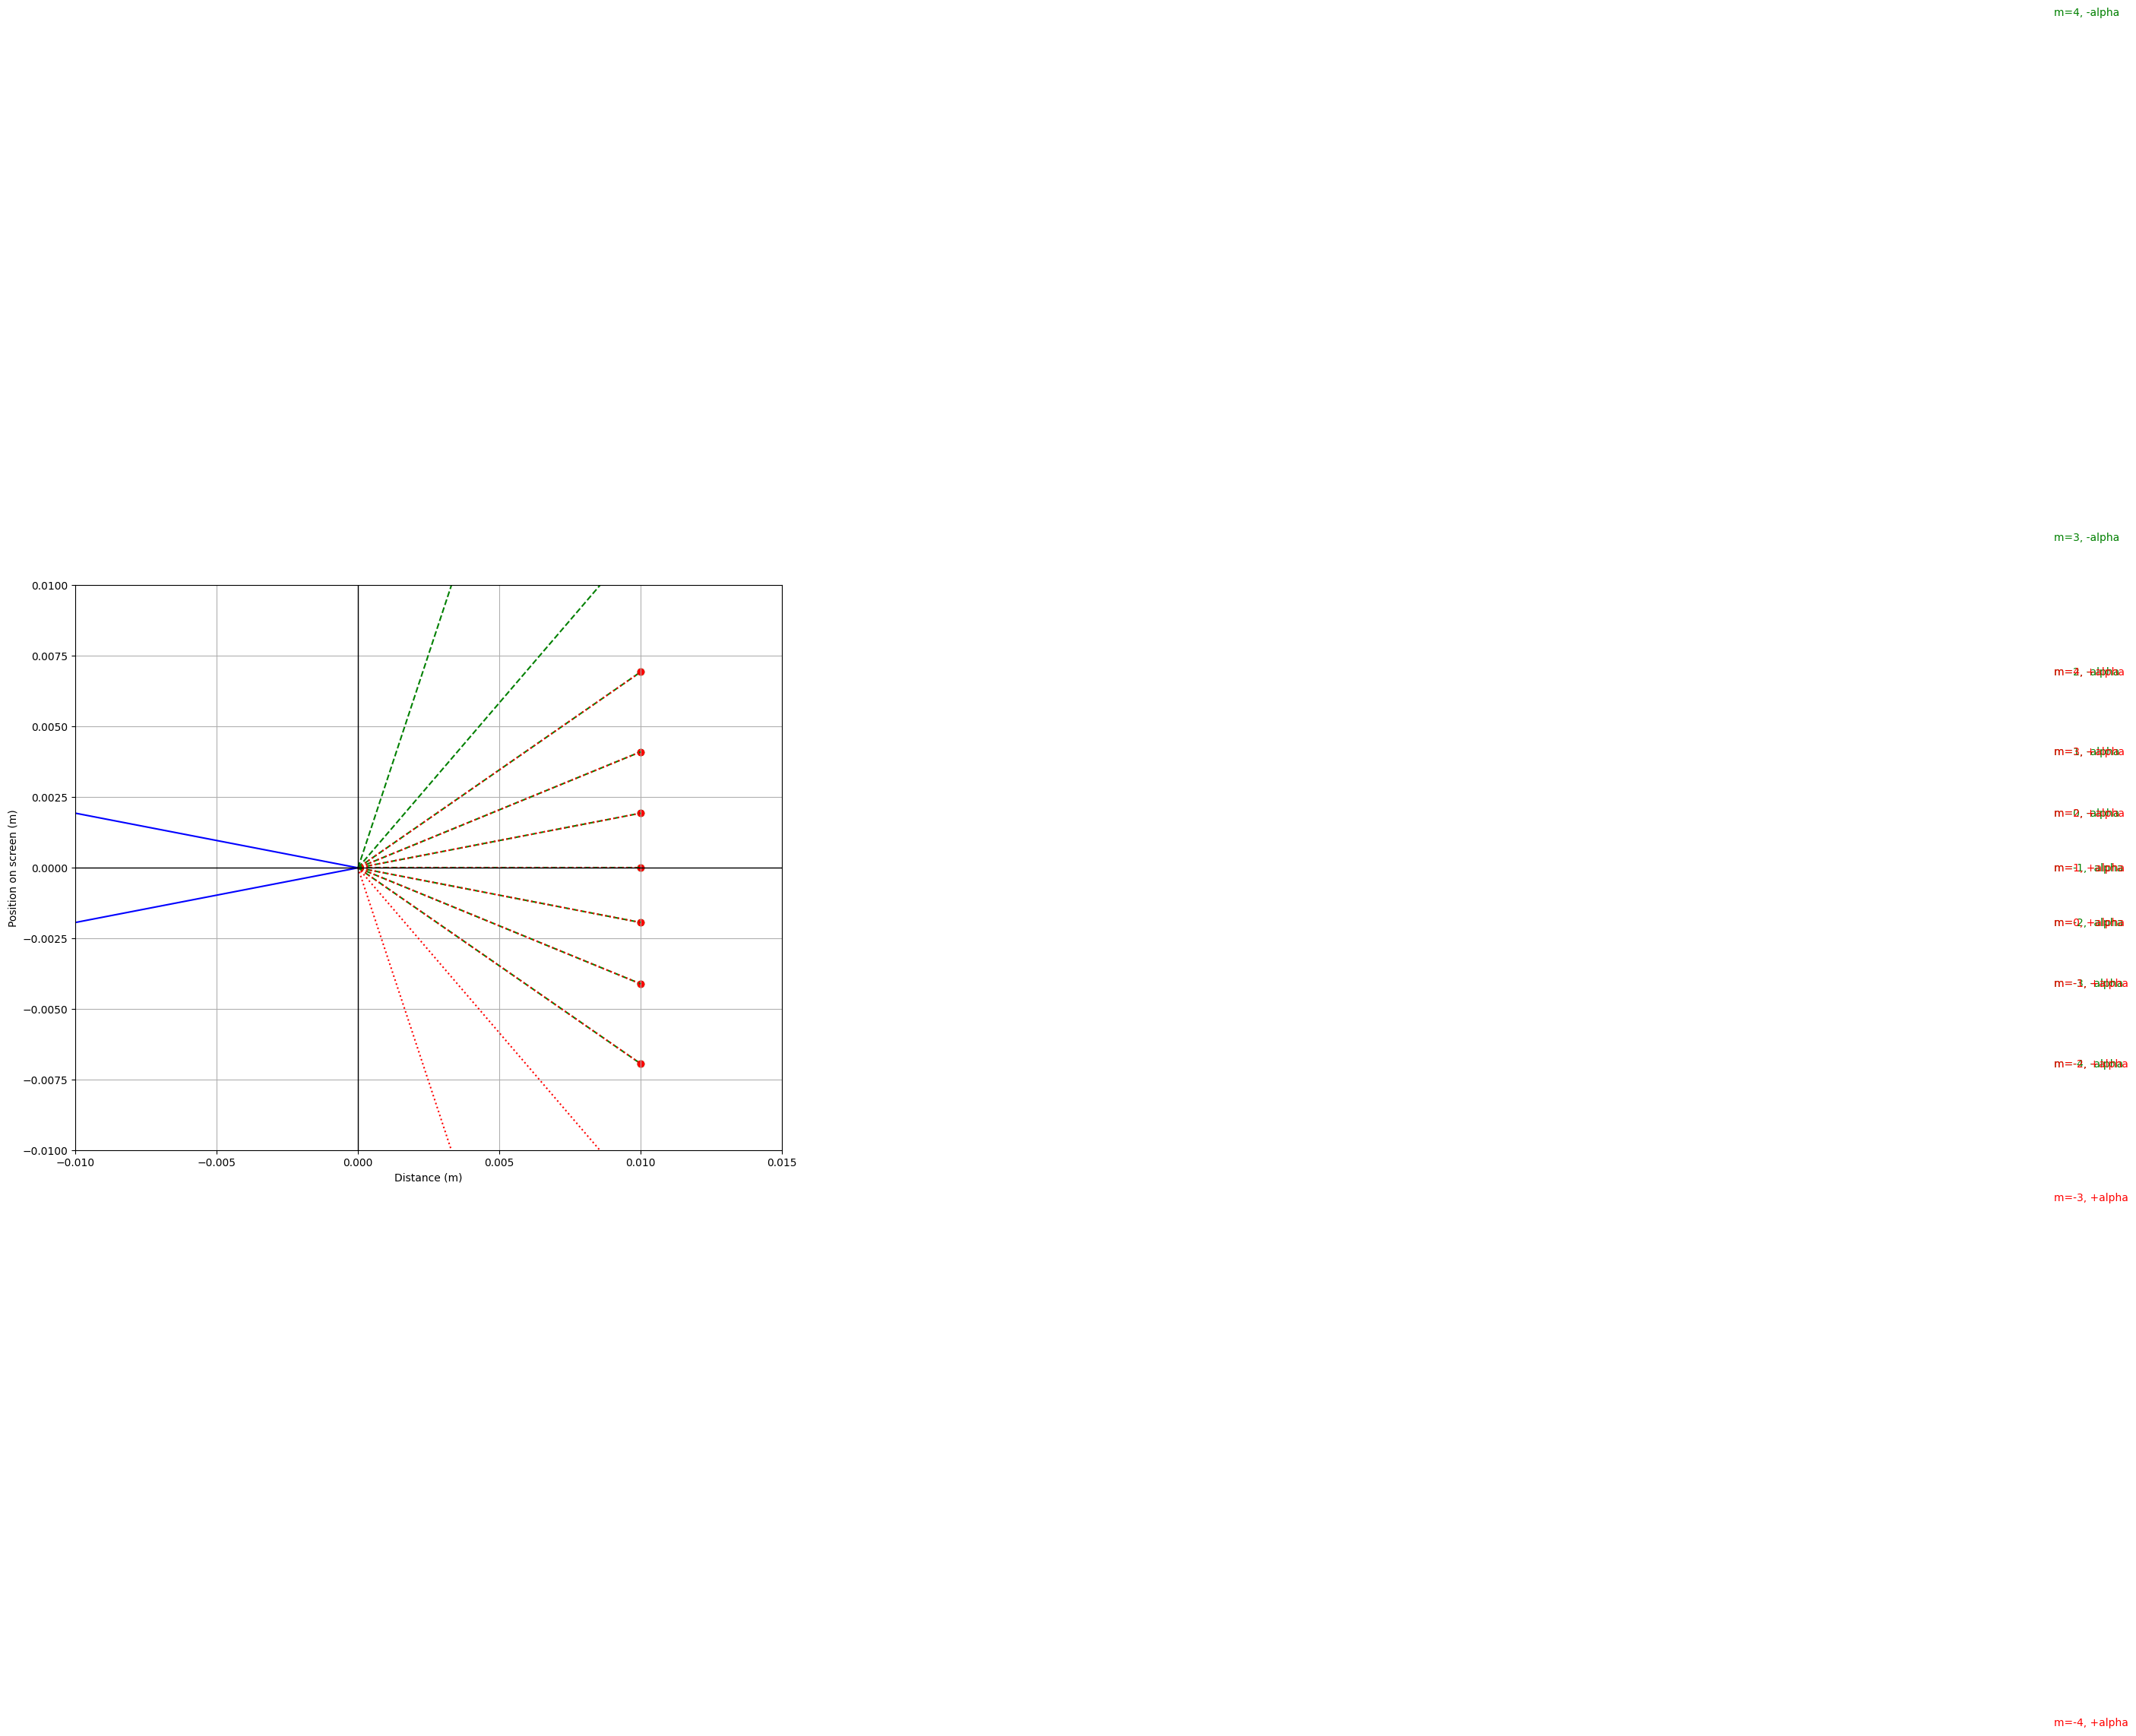

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
alpha = 0.19106029214617076  # Incident angle in radians
wl = 633e-9  # Wavelength in meters
d = 1e-3 / 300  # Grating spacing in meters
L = 0.01  # Distance to screen in meters
label_offset = 0.05  # Offset for labels to avoid overlap

# Create a figure and axis for plotting with figsize (12, 10)
fig, ax = plt.subplots(figsize=(12, 12))

# Plot the incident rays from the left at angles +alpha and -alpha
x_left = np.linspace(-L, 0, 100)  # From -L to 0
y_left_pos = np.tan(alpha) * x_left   # Line equation for the ray at +alpha
y_left_neg = np.tan(-alpha) * x_left  # Line equation for the ray at -alpha

# Plot the two incoming rays
ax.plot(x_left, y_left_pos, 'b-', label=f"Incident ray at +alpha = {alpha:.4f} rad")
ax.plot(x_left, y_left_neg, 'b-', label=f"Incident ray at -alpha = {alpha:.4f} rad")

# Calculate and plot diffraction orders
for m in range(-4, 5):
    try:
        # Calculate angles for diffraction maxima
        angle_pos = np.arcsin(m * wl / d - np.sin(alpha))
        angle_neg = np.arcsin(m * wl / d - np.sin(-alpha))
        
        # Calculate the position on the screen (at distance L)
        pos_pos = np.tan(angle_pos) * L
        pos_neg = np.tan(angle_neg) * L

        # Plot the diffracted rays for positive alpha (use red for all these rays)
        ax.plot([0, L], [0, pos_pos], 'r:')
        
        # Plot the diffracted rays for negative alpha (use green for all these rays)
        ax.plot([0, L], [0, pos_neg], 'g--')

        # Mark the positions of maxima on the screen
        ax.scatter(L, pos_pos, color='red')
        ax.scatter(L, pos_neg, color='green')

        # If the maxima positions are close, adjust the labels to avoid overlap
        if np.abs(angle_pos - angle_neg) < 0.05:  # Threshold to determine if they're close
            # Shift one label up and one label down slightly
            ax.text(L + 0.05, pos_pos + label_offset, f"m={m}, +alpha", color='red', verticalalignment='center')
            ax.text(L + 0.05, pos_neg - label_offset, f"m={m}, -alpha", color='green', verticalalignment='center')
        else:
            # If they're not close, place them normally
            ax.text(L + 0.05, pos_pos, f"m={m}, +alpha", color='red', verticalalignment='center')
            ax.text(L + 0.05, pos_neg, f"m={m}, -alpha", color='green', verticalalignment='center')

        print(f"Order {m}: Angle pos={angle_pos:.4f}, pos on screen={pos_pos:.4f}")
        print(f"Order {m}: Angle neg={angle_neg:.4f}, pos on screen={pos_neg:.4f}")

    except ValueError:
        # Skip the case where arcsin produces a domain error
        print(f"Order {m}: Invalid (arcsin domain error)")

# Customize plot
ax.axhline(0, color='black', linewidth=1)  # x-axis
ax.axvline(0, color='black', linewidth=1)  # y-axis
ax.set_xlim(-L, L * 1.5)
ax.set_ylim(-L, L)
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Position on screen (m)')
ax.grid(True)
ax.set_aspect('equal', 'box')

# Show the plot
plt.show()
